# Import Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [73]:
data = pd.read_csv("./datasets/final_data.csv")

In [74]:
data.drop(columns=['Date'], inplace=True)

In [75]:
data.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,...,Day,max,min,mean,median,std,Total_MarkDown,Type_A,Type_B,Type_C
0,1,1,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,...,5,0.088635,0.253530,0.208157,0.173215,0.138276,0.0,1,0,0
1,9,97,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,...,5,0.001180,0.064648,0.004499,0.004767,0.004083,0.0,0,1,0
2,9,85,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,...,5,0.003866,0.066212,0.009135,0.008968,0.004314,0.0,0,1,0
3,8,80,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,...,5,0.018453,0.161046,0.085594,0.086290,0.010611,0.0,1,0,0
4,9,55,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,...,5,0.044887,0.126993,0.080242,0.071542,0.054362,0.0,0,1,0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374247 entries, 0 to 374246
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Store           374247 non-null  int64  
 1   Dept            374247 non-null  int64  
 2   Weekly_Sales    374247 non-null  float64
 3   Size            374247 non-null  float64
 4   Temperature     374247 non-null  float64
 5   Fuel_Price      374247 non-null  float64
 6   CPI             374247 non-null  float64
 7   Unemployment    374247 non-null  float64
 8   IsHoliday       374247 non-null  int64  
 9   Year            374247 non-null  int64  
 10  Month           374247 non-null  int64  
 11  Day             374247 non-null  int64  
 12  max             374247 non-null  float64
 13  min             374247 non-null  float64
 14  mean            374247 non-null  float64
 15  median          374247 non-null  float64
 16  std             374247 non-null  float64
 17  Total_Mark

In [77]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month', 'Day', 'max',
       'min', 'mean', 'median', 'std', 'Total_MarkDown', 'Type_A', 'Type_B',
       'Type_C'],
      dtype='object')

# Split Dataset in train and test

In [78]:
X = data.drop('Weekly_Sales', axis=1)
y = data['Weekly_Sales']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (374247, 20)
Shape of y: (374247,)


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (299397, 20)
Shape of y_train: (299397,)
Shape of X_test: (74850, 20)
Shape of y_test: (74850,)


# Feature Scaling
## Machine Learning Model Training

In [80]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random Forest

In [81]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.76571277690282


In [83]:
y_pred = rf.predict(X_test)

In [84]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015922750073348133
MSE 0.0010138841783331755
RMSE 0.03184154798895895
R2 0.9776596691838704


In [85]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df

,Actual,Predicted
71711,0.235462,0.259401
328450,0.373851,0.322622
75572,0.059997,0.058941
71207,0.291134,0.244134
99946,0.021164,0.026628
...,...,...
55627,0.042655,0.047354
213601,0.014572,0.012656
63390,0.402230,0.428433
293713,0.092883,0.082984


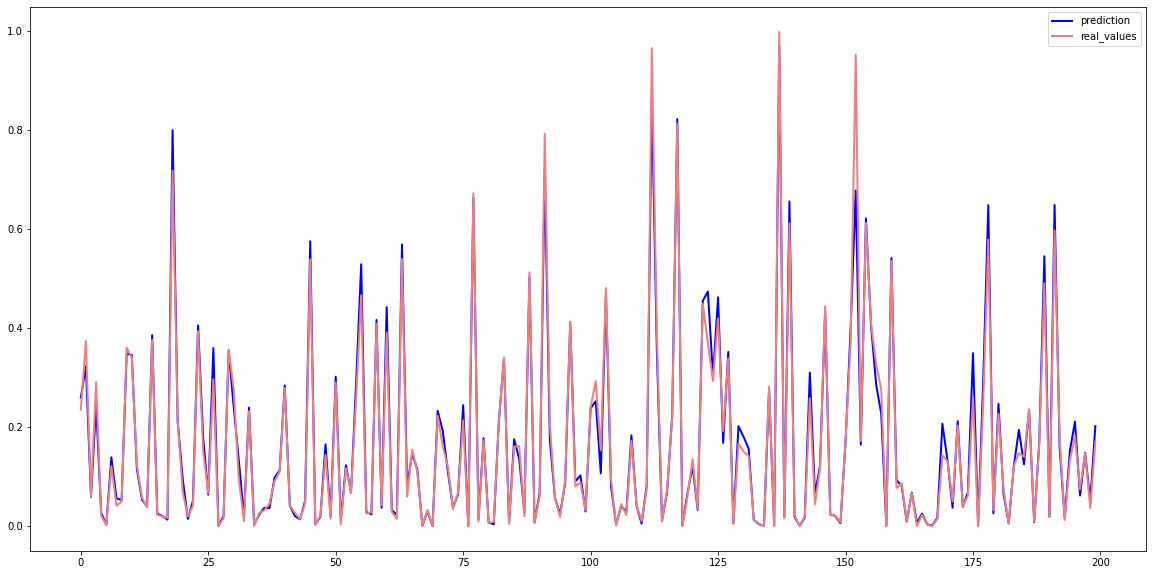

In [86]:
plt.figure(figsize=(20,10))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

### Linear Regression

In [87]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [88]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Random Forest Regressor Accuracy -  92.3547923529665


In [89]:
y_lr_pred = lr.predict(X_test)

In [90]:
print("MAE" , metrics.mean_absolute_error(y_test, y_lr_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_lr_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_lr_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_lr_pred))

MAE 0.030005667384716925
MSE 0.003469274224579815
RMSE 0.05890054519764494
R2 0.9235479259405164


In [91]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_lr_pred})
lr_df

,Actual,Predicted
71711,0.235462,0.274435
328450,0.373851,0.268873
75572,0.059997,0.058322
71207,0.291134,0.232593
99946,0.021164,0.040354
...,...,...
55627,0.042655,0.052123
213601,0.014572,0.016695
63390,0.402230,0.438456
293713,0.092883,0.100032


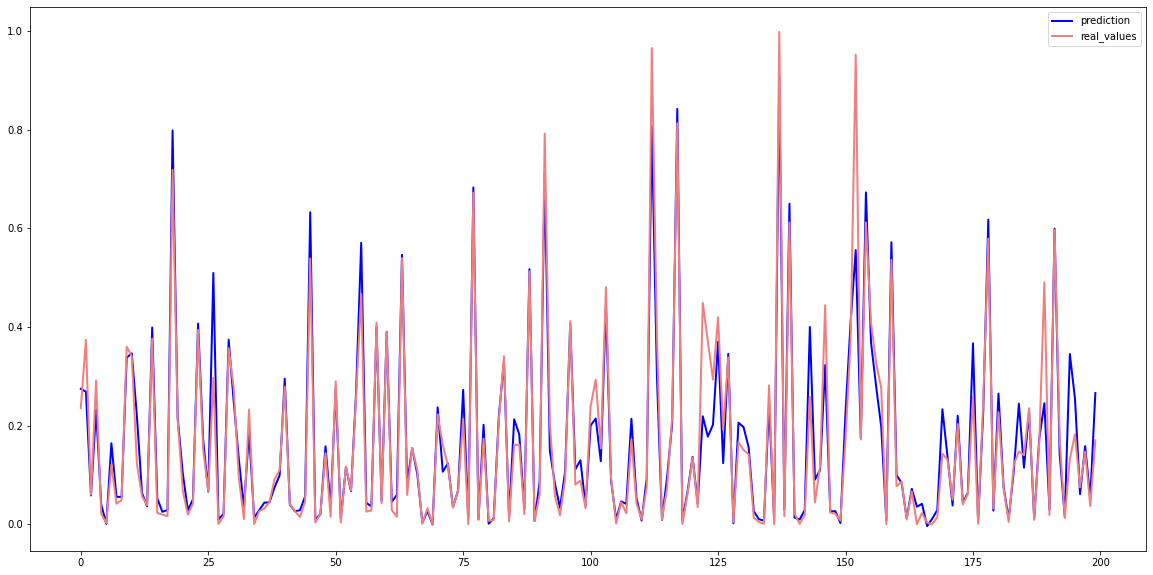

In [92]:
plt.figure(figsize=(20,10))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

### KNN

In [93]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [94]:
knn_acc = knn.score(X_test,y_test)*100
print("KN Regressor Accuracy - ",knn_acc)

KN Regressor Accuracy -  94.25159127293571


In [95]:
y_knn_pred = knn.predict(X_test)

In [96]:
print("MAE" , metrics.mean_absolute_error(y_test, y_knn_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_knn_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_knn_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_knn_pred))

MAE 0.02925910661171641
MSE 0.002608536896560551
RMSE 0.05107383769172384
R2 0.9427415258508136


In [97]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_knn_pred})
knn_df

,Actual,Predicted
71711,0.235462,0.239212
328450,0.373851,0.178526
75572,0.059997,0.065027
71207,0.291134,0.241112
99946,0.021164,0.025973
...,...,...
55627,0.042655,0.041236
213601,0.014572,0.016573
63390,0.402230,0.443389
293713,0.092883,0.095671


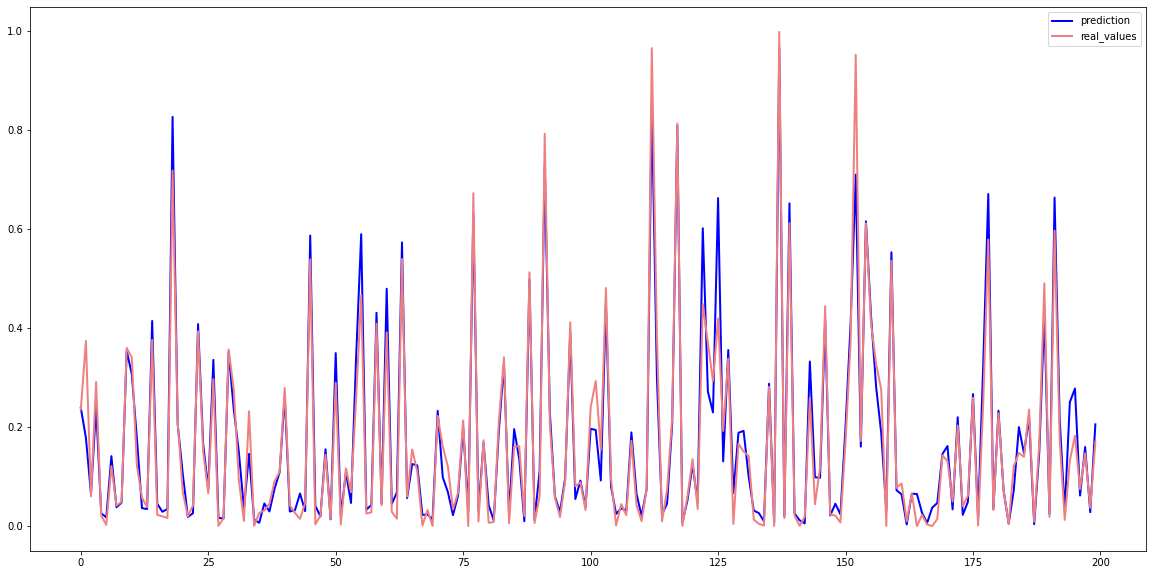

In [98]:
plt.figure(figsize=(20,10))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

## Comparing Models

In [99]:
acc = {'model':['rf_acc','knn_acc','lr_acc'],'accuracy':[rf_acc,knn_acc,lr_acc]}

In [100]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,rf_acc,97.765713
1,knn_acc,94.251591
2,lr_acc,92.354792


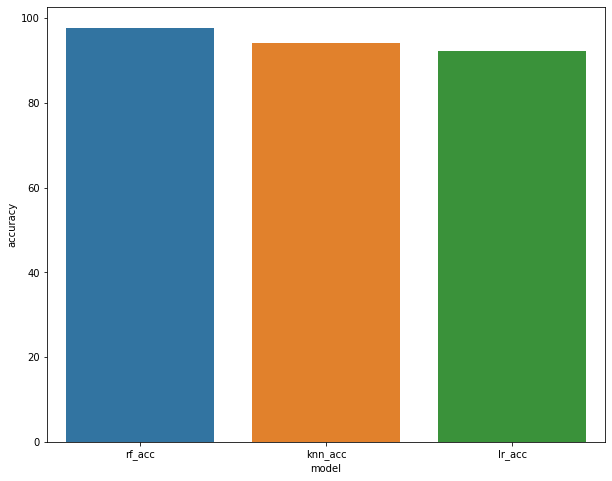

In [107]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()

## --------------------------------------Notebook End----------------------------------------------